# RESULTS ARE WRONG - TYPO FIXED, RERUN NECESSARY, ~79mins

In [1]:
from gcVoronoi import *

import geopandas as gpd
import pandas as pd
import os
from shapely import geometry
import matplotlib.pyplot as plt

## Voronoi Tessellation

In [2]:
gdf = gpd.read_file(os.path.join('SA healthsites', 'South Africa-node.shp'))
hosps = gdf[gdf['amenity'] == 'hospital'].drop_duplicates(subset='geometry', keep='first')
boundary = gpd.read_file(os.path.join('SA border', 'zaf_admbnda_adm0_sadb_ocha_20201109.shp'))

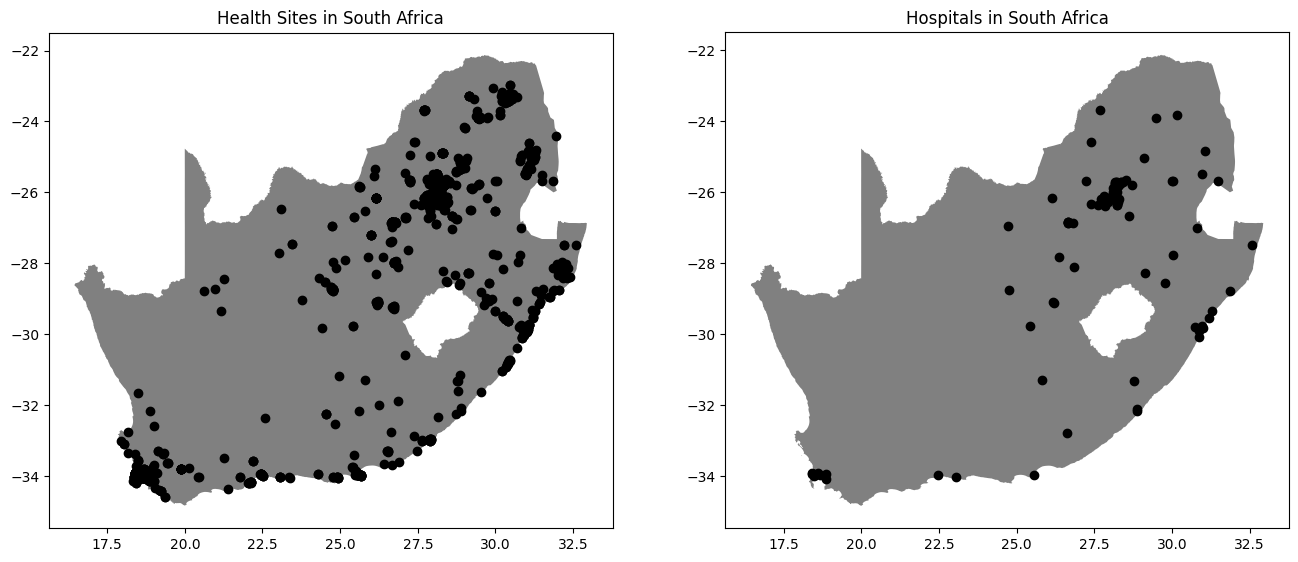

In [3]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 9))
boundary.plot(ax=axs[0], color='gray')
boundary.plot(ax=axs[1], color='gray')
gdf.plot(ax=axs[0], color='black')
hosps.plot(ax=axs[1], color='black')

axs[0].set_title('Health Sites in South Africa')
axs[1].set_title('Hospitals in South Africa')
plt.show()


In [4]:
vor = gcVoronoi(hosps.geometry.to_list())
uncon = vor.unconstrained_polygons
uncon_gS = vor.to_geoSeries(constrained=False)
vor.geo_constrain(boundary.geometry[0])
con = vor.constrained_polygons
con_gS = vor.to_geoSeries(constrained=True)

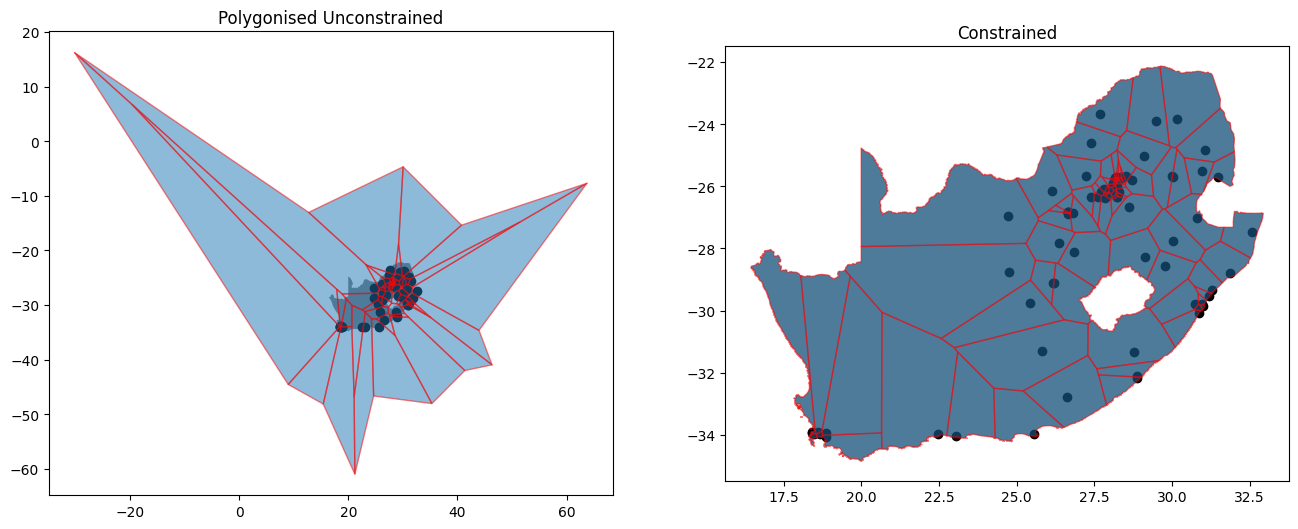

In [5]:
fig2, axs2 = plt.subplots(ncols=2, figsize=(16,9))
boundary.plot(ax=axs2[0], color='gray')
boundary.plot(ax=axs2[1], color='gray')
hosps.plot(ax=axs2[0], color='black')
hosps.plot(ax=axs2[1], color='black')
uncon_gS.plot(ax=axs2[0], alpha=0.5, edgecolor='red')
con_gS.plot(ax=axs2[1], alpha=0.5, edgecolor='red')

axs2[0].set_title('Polygonised Unconstrained')
axs2[1].set_title('Constrained')

plt.show()

## Interfacing with WorldPop

In [6]:
#reading WorldPop and adding empty geometry
pop_df = pd.read_csv(os.path.join('SA pop', 'SA_2020_1km_Aggregated_UNadj.csv'))
print(len(pop_df))
pop_df['geometry'] = geometry.Point()
pop_df.head()

1631509


,X,Y,Z,geometry
0,29.627917,-22.129583,52.359524,POINT EMPTY
1,29.636250,-22.129583,23.651224,POINT EMPTY
2,29.644583,-22.129583,33.294270,POINT EMPTY
3,29.652917,-22.129583,194.087601,POINT EMPTY
4,29.661250,-22.129583,123.925270,POINT EMPTY


In [7]:
#making shapely.geometry.Point from each entry
for i in pop_df.index:
    pop_df.loc[i, 'geometry'] = geometry.Point(pop_df.loc[i, 'X'], pop_df.loc[i, 'Y'])
    print(i, end='\r')
pop_df.head()

,X,Y,Z,geometry
0,29.627917,-22.129583,52.359524,POINT (29.62791654997868 -22.129583023744)
1,29.636250,-22.129583,23.651224,POINT (29.63624988327868 -22.129583023744)
2,29.644583,-22.129583,33.294270,POINT (29.64458321657868 -22.129583023744)
3,29.652917,-22.129583,194.087601,POINT (29.65291654987868 -22.129583023744)
4,29.661250,-22.129583,123.925270,POINT (29.66124988317868 -22.129583023744)


In [8]:
pop_gdf = gpd.GeoDataFrame(pop_df[['geometry', 'Z']], geometry='geometry')

In [9]:
# fig3, ax3 = plt.subplots(figsize=(16, 9))
# pop_gdf.plot(ax=ax3, column='Z')
# plt.show()

In [10]:
pop_list = np.zeros(len(con))
for i in pop_gdf.index:
    print('point: ', i, end='\r')
    for j in range(len(con)):
        if pop_gdf.loc[i, 'geometry'].within(con[j]):
            pop_list[j] += pop_gdf.loc[i, 'Z']
            break

In [11]:
pop_list

array([1.99312725e+05, 9.69478730e+04, 2.41726679e+06, 5.36075456e+05,
       9.79388705e+05, 1.32609398e+06, 1.67182299e+06, 2.39093151e+05,
       6.93567891e+05, 4.30420399e+05, 1.87818067e+05, 2.67276907e+05,
       9.47134778e+05, 4.73263960e+05, 2.75427858e+06, 5.10069051e+05,
       5.11277265e+05, 1.28947485e+06, 1.81892643e+05, 8.32710869e+05,
       2.65649958e+05, 5.71556305e+05, 6.51924035e+05, 2.87569065e+05,
       9.57063670e+04, 4.29968936e+05, 3.10013671e+04, 8.38564256e+05,
       9.36023461e+05, 3.60680085e+05, 4.13785846e+05, 1.39509067e+06,
       7.36347252e+05, 3.29136418e+05, 6.75493407e+03, 6.32837900e+04,
       3.45814865e+05, 1.06511061e+06, 1.75381479e+06, 1.51592341e+06,
       8.45360286e+05, 5.40552577e+05, 4.84704889e+05, 8.54964509e+05,
       2.47191451e+05, 6.58619962e+05, 1.18219792e+06, 1.97023796e+05,
       1.51172064e+05, 1.37491339e+05, 1.36181722e+06, 9.73511304e+03,
       2.58539867e+04, 4.83974900e+05, 1.92689709e+03, 4.22311861e+05,
      

[70] is so small it doesn't have a population

In [12]:
con_gDF = gpd.GeoDataFrame(data={
    'geometry': con_gS,
    'pop': pop_list
}, geometry='geometry')
con_gDF.head()

,geometry,pop
0,"POLYGON ((26.78793 -26.12130, 27.41711 -25.983...",1.993127e+05
1,"POLYGON ((26.12805 -29.80849, 25.44903 -29.016...",9.694787e+04
2,"POLYGON ((29.28095 -29.93744, 29.67161 -30.439...",2.417267e+06
3,"POLYGON ((28.13862 -26.12638, 28.04671 -26.041...",5.360755e+05
4,"POLYGON ((30.90769 -28.36149, 30.78490 -28.457...",9.793887e+05


In [13]:
hosps['pop'] = pop_list
hosps.head()

,osm_id,amenity,healthcare,name,operator,source,speciality,operator_t,contact_nu,operationa,...,electricit,is_in_heal,url,addr_house,addr_stree,addr_postc,addr_city,changeset_,geometry,pop
6,1606184181,hospital,hospital,Leslie Williams memorial hospital,None,None,None,None,+27 (0)18 788 1000,None,...,None,None,None,None,R500 Road,2499,"Oberholzer, Carltonville",Stephanievanr,POINT (27.38758 -26.33678),1.993127e+05
54,1818857246,hospital,hospital,Medicare Healthcare Group,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Kadubei,POINT (26.18755 -29.10396),9.694787e+04
92,1904552955,hospital,hospital,Dr Malizo Mpehle Memorial,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Khathucry,POINT (28.77731 -31.31742),2.417267e+06
118,366197021,hospital,hospital,Carstenhof Clinic,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Conlinp,POINT (28.13938 -26.02941),5.360755e+05
132,2123577985,hospital,hospital,Madadeni Provincial Hospital,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Khathucry,POINT (30.05076 -27.76449),9.793887e+05


In [20]:
con_gDF.to_file(os.path.join('results', 'cells_w_population', 'polys_w_pop.shp'))
hosps.to_file(os.path.join('results', 'hosps_w_population', 'points_w_pop.shp'))

## Mapping

In [15]:
# con_gDF = gpd.read_file(os.path.join('results', 'polys_w_pop.shp'))
# hosps = gpd.read_file(os.path.join('results', 'points_w_pop.shp'))

In [16]:
boundary.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
con_gDF.set_crs(boundary.crs)
hosps.set_crs(boundary.crs)
hosps.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

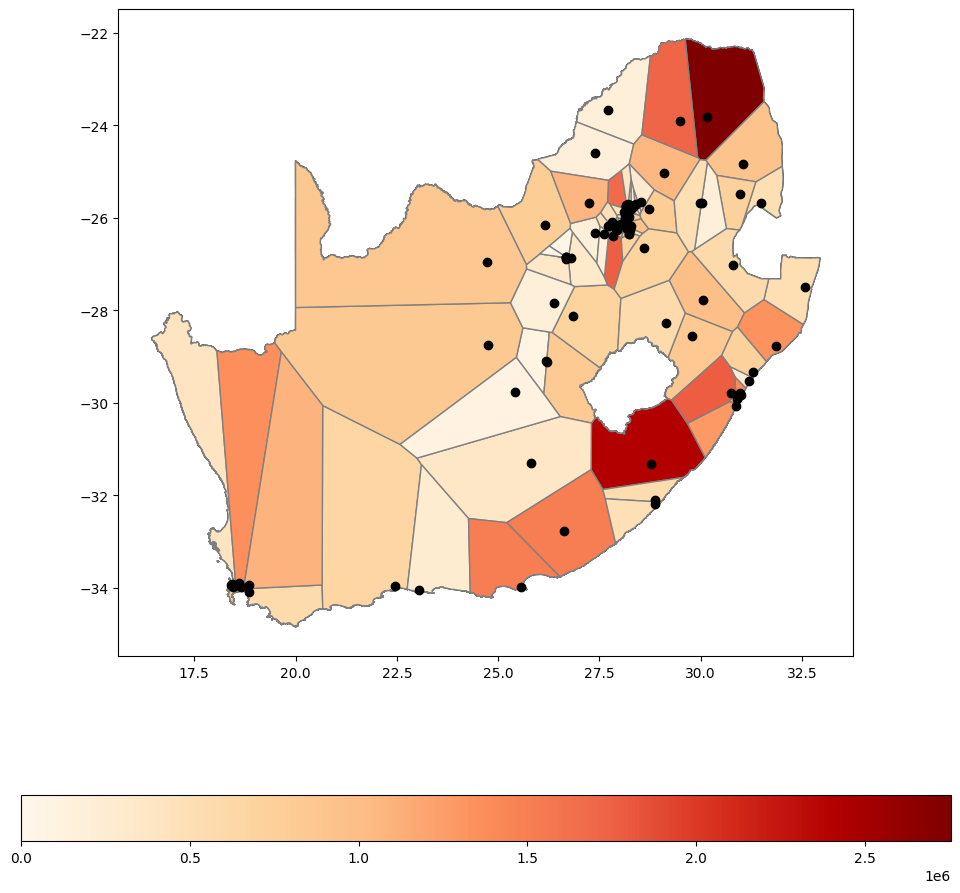

In [18]:
fig4, ax4 = plt.subplots(figsize=(12, 12))
boundary.plot(ax=ax4, color='none')
con_gDF.plot(ax=ax4, column='pop', cmap='OrRd', legend=True, legend_kwds={'orientation': 'horizontal'}, edgecolor='grey')
hosps.plot(ax=ax4, color='black')

In [23]:
# m = boundary.explore(
#     fillColor='none',
#     # color='k',
#     tooltip=False,
#     popup = False,
#     name='border',
#     # height='50%',
#     # width='50%'
# )

# con_gDF.explore(
#     m=m,
#     column='pop',
#     legend=True,
#     cmap='OrRd',
#     legend_kwds={'caption': 'pop', 'max_labels': 5},
#     color='black',
#     tooltip='pop'
# )

# hosps.explore(
#     m=m,
#     tooltip=['osm_id', 'name', 'addr_city'],
#     color='black',
#     marker_kwds=dict(radius=6, fill=True),
# )

# m

In [24]:
# m.save(os.path.join('results', 'interactive_choropleth_draft.html'))